In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/Vegetables.zip" "Vegetables.zip"

In [3]:
!unzip "Vegetables.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

1 Data Preprocessing

In [4]:
import os
import shutil

In [5]:
# Define the paths to the dataset
train_dir = '/content/Vegetable Images/train'
valid_dir = '/content/Vegetable Images/validation'
test_dir = '/content/Vegetable Images/test'

In [6]:
# Preprocess the data
from keras.preprocessing.image import ImageDataGenerator


In [7]:
# Define the data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Set the image size and batch size
img_width, img_height = 150, 150
batch_size = 32

In [9]:
# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 15000 images belonging to 15 classes.


In [10]:
# Load the testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3000 images belonging to 15 classes.


2 Model Building

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


In [13]:
# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

This creates a simple CNN model with convolutional, pooling, and dense layers.

3 Training

In [15]:
# Set the number of training and testing steps
train_steps = train_generator.n // batch_size
test_steps = test_generator.n // batch_size


In [95]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [16]:
# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_steps)

Epoch 1/10
468/468 [==============================] - 39s 57ms/step - loss: -6751292227584.0000 - accuracy: 0.0667 - val_loss: -45278509924352.0000 - val_accuracy: 0.0669
Epoch 2/10
468/468 [==============================] - 25s 53ms/step - loss: -543651927162880.0000 - accuracy: 0.0667 - val_loss: -1689591413211136.0000 - val_accuracy: 0.0672
Epoch 3/10
468/468 [==============================] - 26s 55ms/step - loss: -5536017960402944.0000 - accuracy: 0.0666 - val_loss: -11732420428562432.0000 - val_accuracy: 0.0669
Epoch 4/10
468/468 [==============================] - 26s 56ms/step - loss: -24765913152618496.0000 - accuracy: 0.0668 - val_loss: -43105837970882560.0000 - val_accuracy: 0.0669
Epoch 5/10
468/468 [==============================] - 25s 52ms/step - loss: -73441389551026176.0000 - accuracy: 0.0666 - val_loss: -113221840503046144.0000 - val_accuracy: 0.0669
Epoch 6/10
468/468 [==============================] - 25s 53ms/step - loss: -170872645351374848.0000 - accuracy: 0.0665 

4 Evaluation

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_steps)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

93/93 [==============================] - 4s 45ms/step - loss: -1874306548105216000.0000 - accuracy: 0.0665
Test loss: -1874306548105216000.0000
Test accuracy: 0.0665


In [39]:
import numpy as np
import matplotlib.pyplot as plt


visualizing accuracy

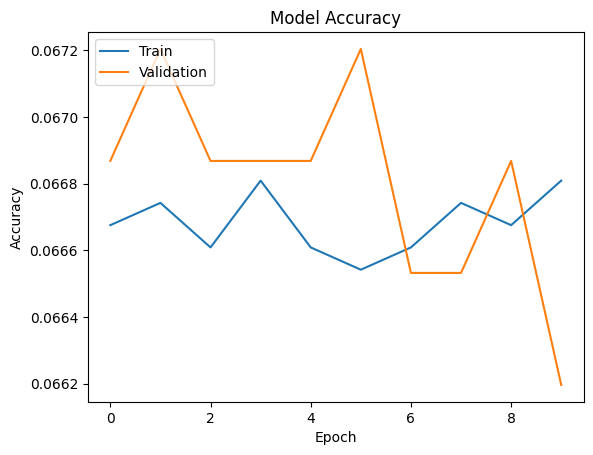

In [40]:
import matplotlib.pyplot as plt

# Assuming you have history object that contains training/validation accuracy values
# history = model.fit(...) or history = model.fit_generator(...)

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [88]:
model.evaluate(test_generator)

94/94 [==============================] - 5s 53ms/step - loss: -1871697544451457024.0000 - accuracy: 0.0667


[-1.871697544451457e+18, 0.06666667014360428]

Testing

In [79]:
from keras.preprocessing import image
import numpy as np

In [81]:
# Load and preprocess the image
test_image_path = '/content/drive/MyDrive/Vegetable Images/test/Bitter_Gourd/1202.jpg'
img = image.load_img(test_image_path, target_size=(img_width, img_height))
img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

In [82]:
# Make predictions
predictions = model.predict(img)
predicted_class = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 17ms/step


In [86]:
# Get the class label
predicted_class = list(class_label.keys())[list(class_label.values()).index(class_index)]


In [87]:
# Print the predicted class
print(f"The predicted class is: {predicted_class}")

The predicted class is: Bitter_Gourd


In [97]:
# Testing the Model
test_image_path = '/content/drive/MyDrive/Vegetable Images/test/Bean/0008.jpg'

In [98]:
def generate_predictions(test_image_path, actual_label):

    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 20ms/step


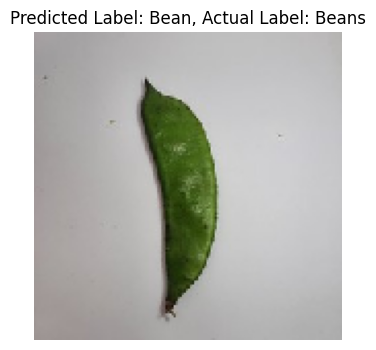

In [100]:
# call the function
generate_predictions(test_image_path, actual_label='Beans')

1/1 [==============================] - 0s 18ms/step


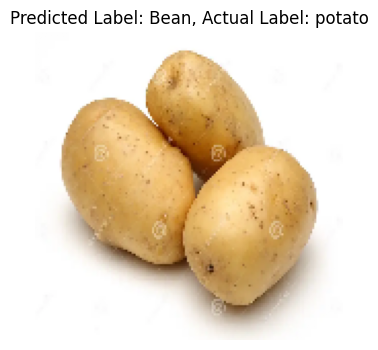

In [102]:
# Generate predictions for external images
external_image_path_1 = "/content/potatoes.webp"
generate_predictions(external_image_path_1, actual_label='potato')

The model performs well with internal test images,but shows some error with external images